In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize



# Carregando o conjunto de dados (exemplo: tweets rotulados com sentimento)
data = pd.read_csv('/Users/batistajunior/Downloads/metodologia de mensuracao/test_data.csv')

# Pré-processamento dos textos
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_text)

data['sentence'] = data['sentence'].apply(preprocess_text)  # Corrigido para usar 'sentence' ao invés de 'text'

# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(data['sentence'], data['sentiment'], test_size=0.2, random_state=42)

# Vetorização dos textos
vectorizer = TfidfVectorizer(max_features=5000)  # Considerando os 5000 termos mais frequentes
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Treinamento do modelo de classificação (SVM neste exemplo)
clf = SVC(kernel='linear')
clf.fit(X_train_vec, y_train)

# Realizando as previsões no conjunto de teste
y_pred = clf.predict(X_test_vec)

# Avaliação do modelo
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.2f}")

# Criando um gráfico de barras para comparar as classificações reais com as classificações preditas
sentiments = ['Positivo', 'Negativo']
actual_counts = [len(y_test[y_test == 1]), len(y_test[y_test == 0])]
predicted_counts = [len(y_pred[y_pred == 1]), len(y_pred[y_pred == 0])]




[nltk_data] Downloading package punkt to
[nltk_data]     /Users/batistajunior/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/batistajunior/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Acurácia do modelo: 0.79


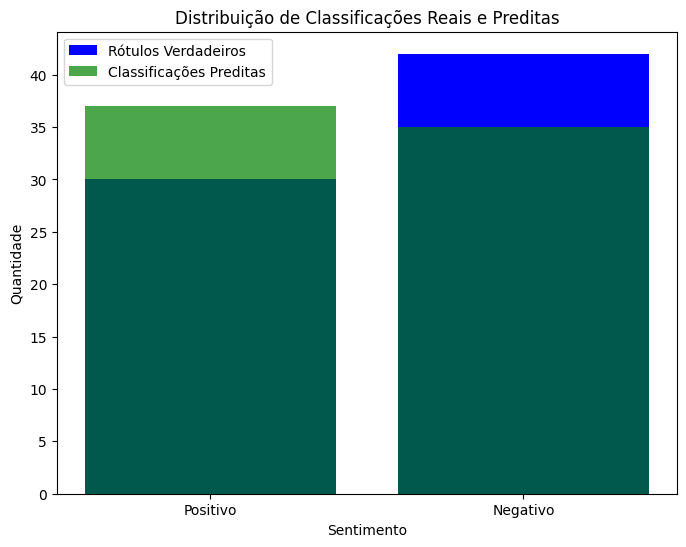

In [2]:
# Criando um gráfico de barras para comparar as classificações reais com as classificações preditas
sentiments = ['Positivo', 'Negativo']
actual_counts = [len(y_test[y_test == 1]), len(y_test[y_test == 0])]
predicted_counts = [len(y_pred[y_pred == 1]), len(y_pred[y_pred == 0])]

plt.figure(figsize=(8, 6))
plt.bar(sentiments, actual_counts, color='b', label='Rótulos Verdadeiros')
plt.bar(sentiments, predicted_counts, color='g', label='Classificações Preditas', alpha=0.7)
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.title('Distribuição de Classificações Reais e Preditas')
plt.legend()
plt.show()

In [3]:
# Cálculo das métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print("Matriz de Confusão:")
print(conf_matrix)


Precision: 0.70
Recall: 0.87
F1-Score: 0.78
Matriz de Confusão:
[[31 11]
 [ 4 26]]


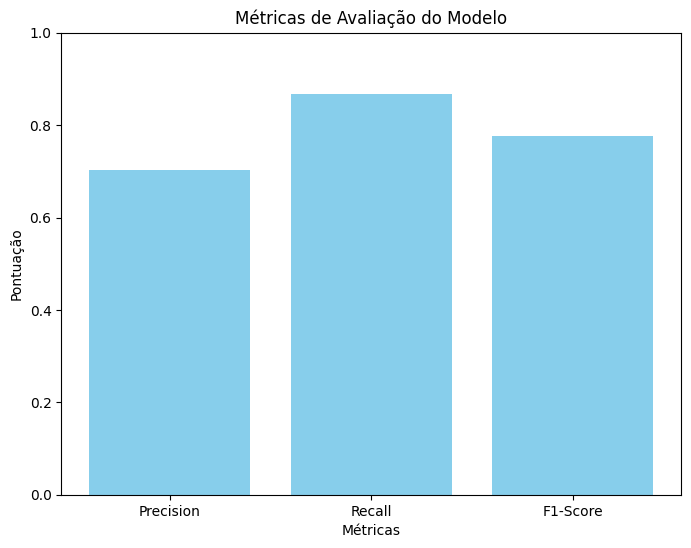

In [4]:
# Cálculo das métricas
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Criação do gráfico de barras
metrics = ['Precision', 'Recall', 'F1-Score']
scores = [precision, recall, f1]

plt.figure(figsize=(8, 6))
plt.bar(metrics, scores, color='skyblue')
plt.xlabel('Métricas')
plt.ylabel('Pontuação')
plt.title('Métricas de Avaliação do Modelo')
plt.ylim(0, 1.0)  # Definindo o limite do eixo y de 0 a 1 para melhor visualização
plt.show()


In [5]:
# Tokenização e pré-processamento dos textos
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_text)

data['sentence'] = data['sentence'].apply(preprocess_text)



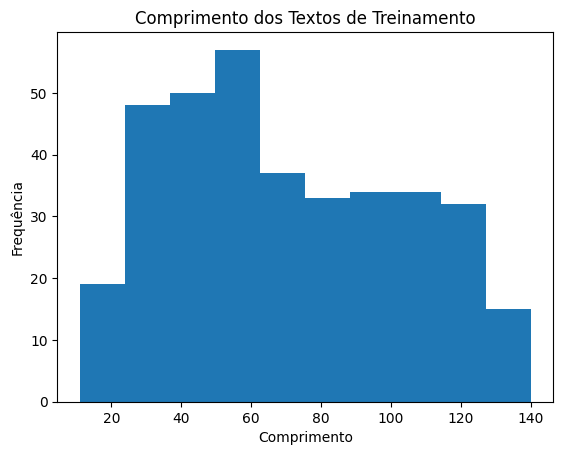

In [6]:
# Carregando o conjunto de dados (exemplo: tweets rotulados com sentimento)
data = pd.read_csv('/Users/batistajunior/Downloads/metodologia de mensuracao/test_data.csv')

# Tokenização e pré-processamento dos textos
def preprocess_text(text):
    stop_words = set(stopwords.words('portuguese'))
    word_tokens = word_tokenize(text.lower())
    filtered_text = [word for word in word_tokens if word.isalnum() and word not in stop_words]
    return " ".join(filtered_text)

data['sentence'] = data['sentence'].apply(preprocess_text)

# Calculando o comprimento dos textos e adicionando ao DataFrame
data['lengths'] = data['sentence'].apply(len)

# Plotando o histograma do comprimento dos textos de treinamento
plt.title("Comprimento dos Textos de Treinamento")
data['lengths'].plot.hist()
plt.xlabel("Comprimento")
plt.ylabel("Frequência")
plt.show()

sentiment
1    182
0    177
Name: count, dtype: int64


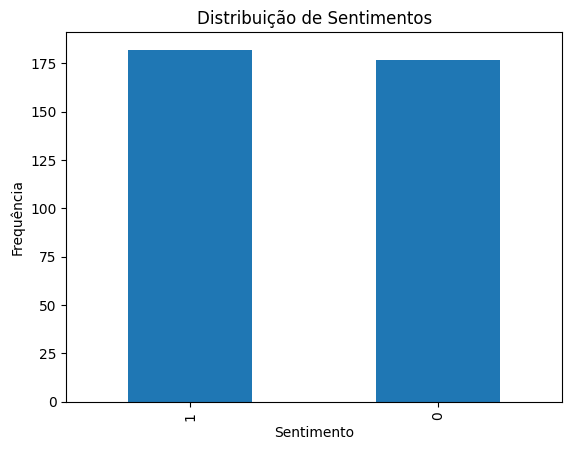

In [7]:
# Carregando o conjunto de dados (exemplo: tweets rotulados com sentimento)
train_data = pd.read_csv('/Users/batistajunior/Downloads/metodologia de mensuracao/test_data.csv')


# Imprimindo a contagem de sentimentos
print(train_data['sentiment'].value_counts())

# Plotando o gráfico de barras da distribuição de sentimentos
plt.title("Distribuição de Sentimentos")
train_data['sentiment'].value_counts().plot.bar()
plt.xlabel("Sentimento")
plt.ylabel("Frequência")
plt.show()
